In [25]:
import numpy as np
import math
from importlib import reload
import matplotlib.pyplot as plt

from renderer import rasterize , renderer, transform, pyramid, interpolate

reload(interpolate)
reload(rasterize)
reload(renderer)
reload(transform)
reload(pyramid)

<module 'renderer.pyramid' from 'C:\\Users\\Nalu Zou\\Documents\\Self study\\CV\\Ch3 exercises\\renderer\\pyramid.py'>

(880, 587)


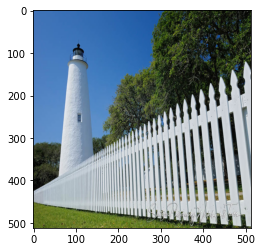

In [3]:
from PIL import Image, ImageOps

img = Image.open("Lighthouse.JPG")
print(img.size)
img = img.resize((512, 512), Image.ANTIALIAS)
img = np.array(img)
img = img[:, :, :3]
plt.imshow(img, cmap="gray")

In [25]:
uv = np.array([[1, 200], [1, 1]])
uv2 = np.array([[1, 200], [1, 1]])

sampled = img[uv, uv2, :]
print(img[1, 1, :])
print(img[200, 200, :])
print(sampled.shape)
print(sampled)

[ 65 114 183]
[102 123 103]
(2, 2, 3)
[[[ 65 114 183]
  [102 123 103]]

 [[ 65 114 183]
  [ 65 114 183]]]


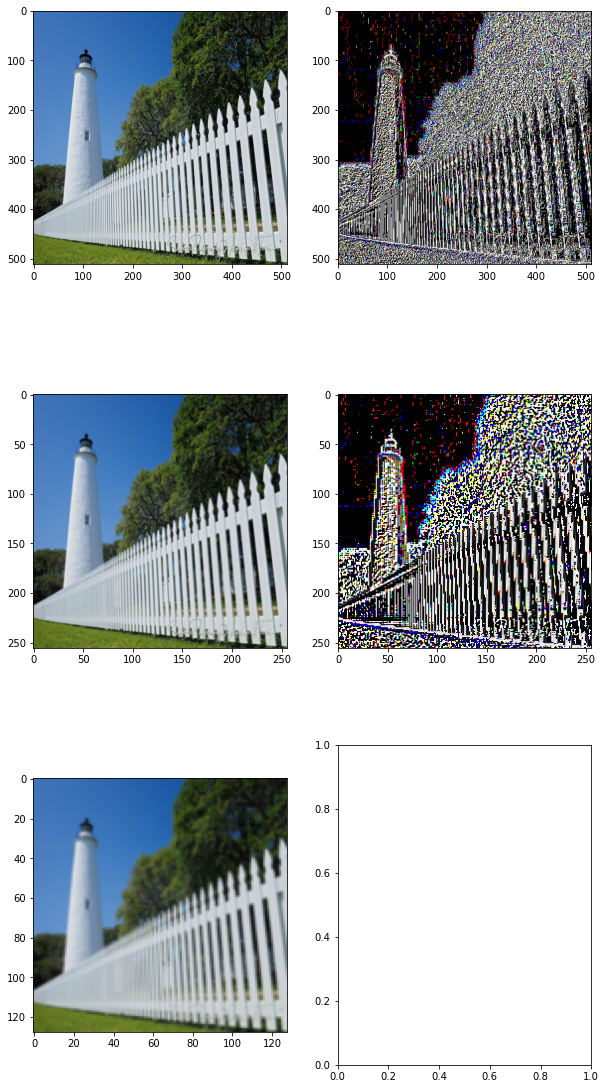

In [363]:
layers, band_passes = pyramid.get_pyramid(img, 2)

fig, axs = plt.subplots(len(layers), 2, figsize=(10, 20))
for i in range(len(layers)):
    axs[i, 0].imshow(layers[i])
    if i < 2:
        axs[i, 1].imshow(band_passes[i])

1.8504982317656795 0.0
First
second
Third
First
second
Third
First
second
Third
First
second
Third
3.6062470454195985
1.8504982317656797 0.0
First
second
Third
First
second
Third
First
second
Third
First
second
Third
3.6062470454195994


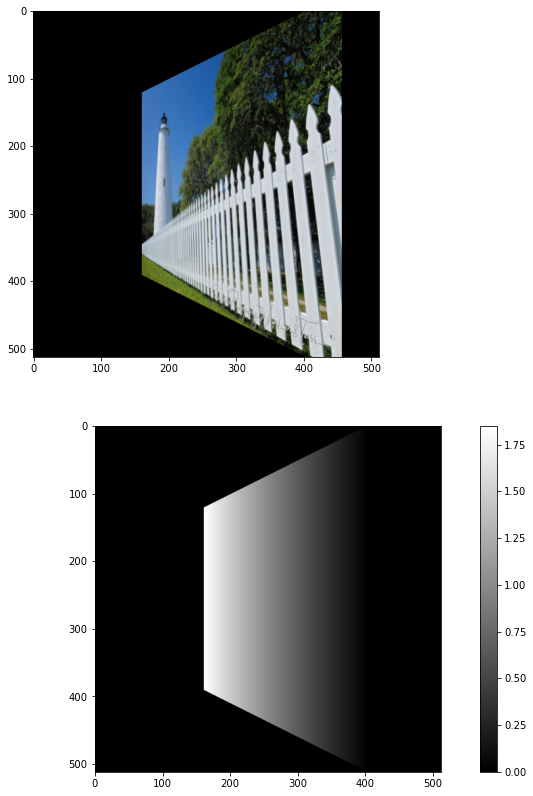

In [26]:
points = [
    [0.5, -0.5, 1],
    [0.5, 0.5, 1],
    [-0.5, 0.5, 1],
    [-0.5, -0.5, 1]
]

triangles = [
    [0, 1, 2],
    [0, 2, 3]
]

uvs = [
    [511, 511],
    [0, 511],
    [0, 0],
    [511, 0]
]

canvas, mip_canvas = renderer.render(points, triangles, uvs, img, -math.pi/4, 0, 0, -0.7, 0.7, -0.7, 0.7, 512, 512)

fig, axs = plt.subplots(2, figsize=(14, 14))
axs[0].imshow(canvas)
im = axs[1].imshow(mip_canvas, cmap="gray")
plt.colorbar(im, ax=axs[1])